In [1]:
import pandas as pd

DATA = r"D:\Pastas\Hashtag Treinamentos\Customer Segmentation\data\Mall_Customers_no_CustomerID_clustered.csv"

df_clustered = pd.read_csv(DATA)

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


In [2]:
import joblib 

kmeans = joblib.load(r"D:\Pastas\Hashtag Treinamentos\Customer Segmentation\models\kmeans.pkl")

kmeans.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [3]:
kmeans.cluster_centers_

array([[56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [32.69230769, 86.53846154, 82.12820513],
       [44.14285714, 25.14285714, 19.52380952]])

In [47]:
print(df_clustered.columns)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')


In [50]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def show_clusters(
        dataframe,
        columns,
        color_amount,
        show_centroids=False, 
        show_points=True):

    fig = plt.figure()

    ax = fig.add_subplot(111, projection="3d")

    colors = plt.cm.tab10.colors[:6]
    colors = ListedColormap(colors)

    centroids = kmeans.cluster_centers_

    x = dataframe[columns[0]]
    y = dataframe[columns[1]]
    z = dataframe[columns[2]]

    catch_centroids = show_centroids
    catch_points = show_points

    for i, centroid, in enumerate(centroids):
        if catch_centroids:
            ax.scatter(*centroid, s=500, alpha=0.5)
            ax.text(*centroid, f"{i}", fontsize=20, horizontalalignment="center", verticalalignment="center")

        if catch_points:
            s = ax.scatter(x, y, z, c=df_clustered["cluster"], cmap=colors)
            ax.legend(*s.legend_elements(), bbox_to_anchor=(1.3, 0.5))

    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_xlabel(columns[2])
    ax.set_title("Customer Segmentation")


    plt.show()




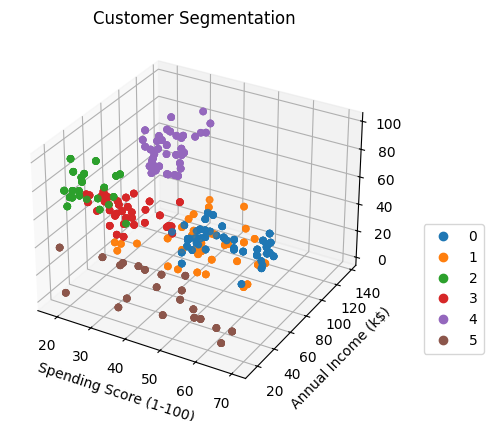

In [51]:
show_clusters(df_clustered, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 6)

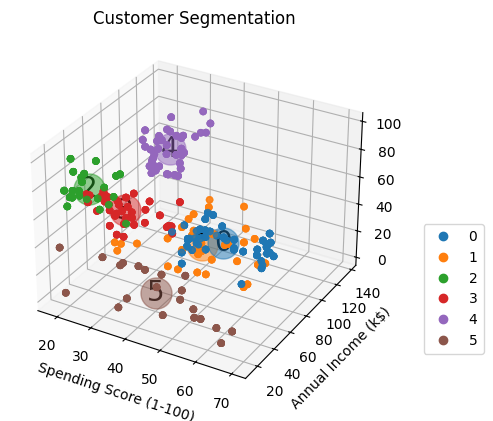

In [53]:
show_clusters(df_clustered, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 6, show_centroids=True, show_points=True)

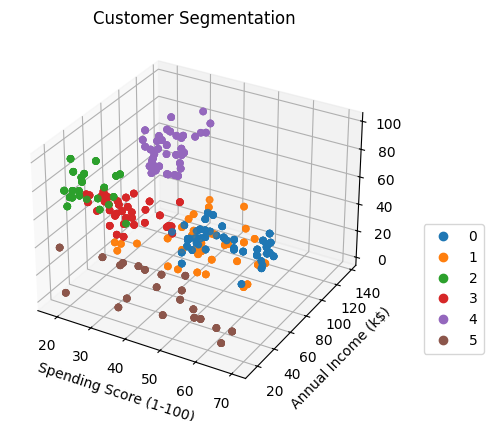

In [54]:
show_clusters(df_clustered, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 6,show_centroids=False, show_points=True)

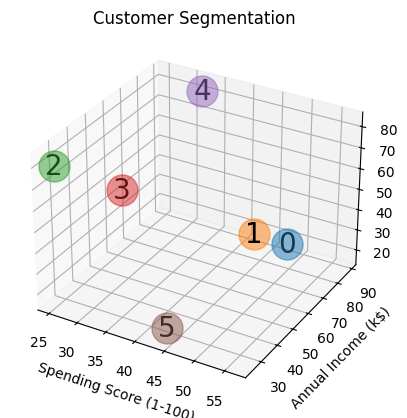

In [55]:
show_clusters(df_clustered, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 6,show_centroids=True, show_points=False)